# Import des extentions de base

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import des data et rapide analyse

In [40]:
titanic = pd.read_csv('../data/titanic.csv')

In [41]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
titanic.describe().astype("int64")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891,891,891,714,891,891,891
mean,446,0,2,29,0,0,32
std,257,0,0,14,1,0,49
min,1,0,1,0,0,0,0
25%,223,0,2,20,0,0,7
50%,446,0,3,28,0,0,14
75%,668,1,3,38,1,0,31
max,891,1,3,80,8,6,512


# Stat descriptive simple 

### Proporttion valeur vide pour chaque variable

In [44]:
for variable in titanic.columns:
    print(f"La variable : {variable} à {(titanic[variable].isna().sum()/len(titanic)*100).round(2)}% de valeur la vide")

La variable : PassengerId à 0.0% de valeur la vide
La variable : Survived à 0.0% de valeur la vide
La variable : Pclass à 0.0% de valeur la vide
La variable : Name à 0.0% de valeur la vide
La variable : Sex à 0.0% de valeur la vide
La variable : Age à 19.87% de valeur la vide
La variable : SibSp à 0.0% de valeur la vide
La variable : Parch à 0.0% de valeur la vide
La variable : Ticket à 0.0% de valeur la vide
La variable : Fare à 0.0% de valeur la vide
La variable : Cabin à 77.1% de valeur la vide
La variable : Embarked à 0.22% de valeur la vide


### Répartition du taux de survie par niveau du bateau 

In [45]:
# Series des cabines non vide
cabine_non_vide = titanic[["Cabin", "Survived"]].dropna()

# On récupère le niveau
cabine_non_vide["Cabin"] = cabine_non_vide['Cabin'].str[0]

# Taux de survie par niveau
cabine_non_vide.groupby("Cabin")["Survived"].mean()*100
# ou
table_croisee = pd.crosstab(cabine_non_vide["Cabin"], cabine_non_vide["Survived"])
table_croisee['Taux de survie (%)'] = ((table_croisee[1] / (table_croisee[0] + table_croisee[1])) * 100).round(2)

# Pas d'impacte sur le raux de survie

# Trie des variables qui sont inutiles sans analyse préalable

In [46]:
titanic = titanic.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

# Analyse des variables explicatives avec la var cible

### Transformation de tout les valeurs alphanumériques en numérique.

In [47]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
for colonne in titanic[["Sex", "Embarked"]]:
    titanic[colonne] = encoder.fit_transform(titanic[colonne])

### Test du V de Cramer

In [48]:
X = titanic.drop("Survived", axis = 1)
y = titanic["Survived"]

In [53]:
from scipy.stats import chi2_contingency as test_chi2

def Cramer(table):
    n=table.sum().sum()
    p=min(table.shape)-1
    chi2=test_chi2(table)[0]
    v = np.sqrt(chi2/(n*p))
    return v

def croisement(cible,variable):
    table=pd.crosstab(cible,variable)
    freq=table.div(table.sum(1), axis=0)
    print(variable.name, ' : V de Cramer : ', np.round(Cramer(table),3))
    freq.plot(kind='bar', stacked=True)
    #plt.ylabel("") #nom de l axe y
    plt.show()

Pclass  : V de Cramer :  0.34


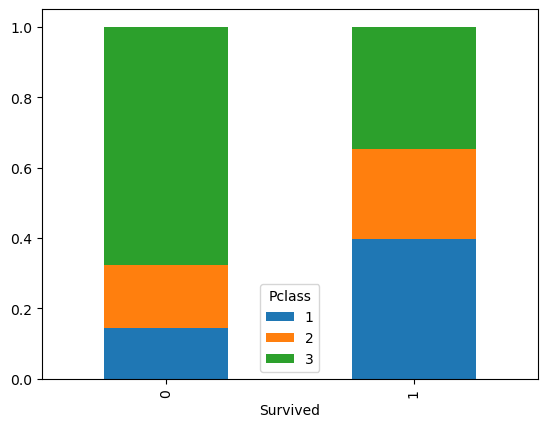

Sex  : V de Cramer :  0.541


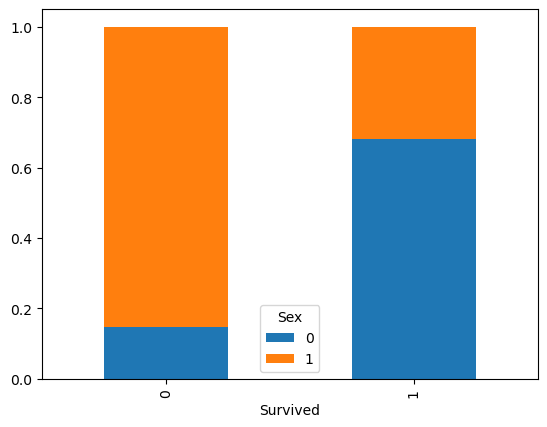

SibSp  : V de Cramer :  0.205


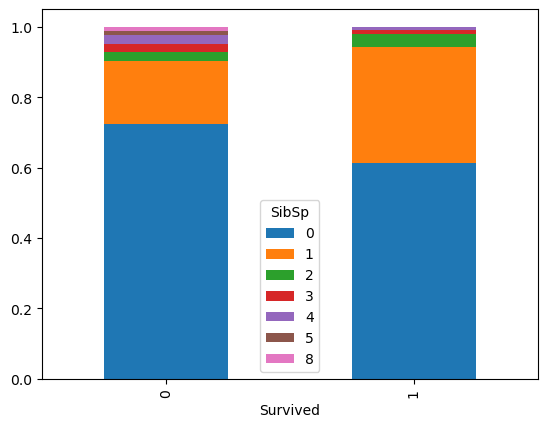

Parch  : V de Cramer :  0.177


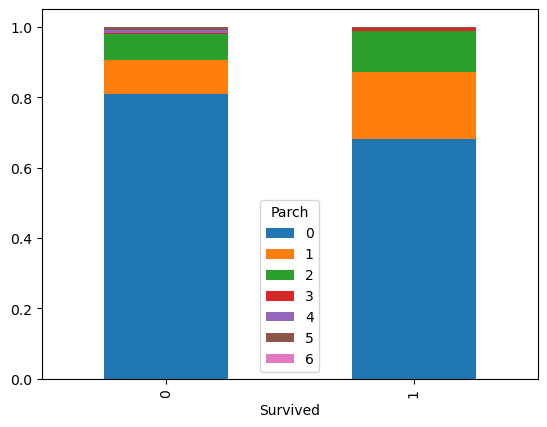

Embarked  : V de Cramer :  0.182


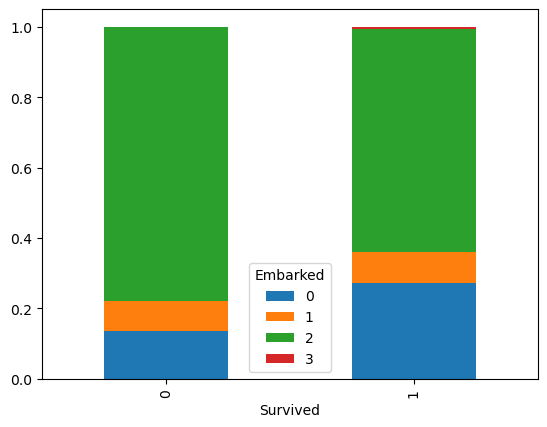

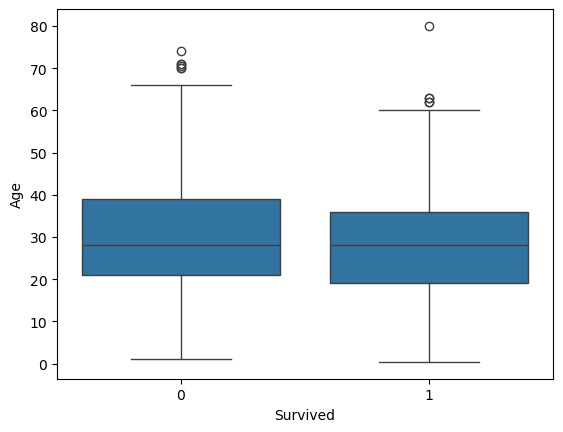

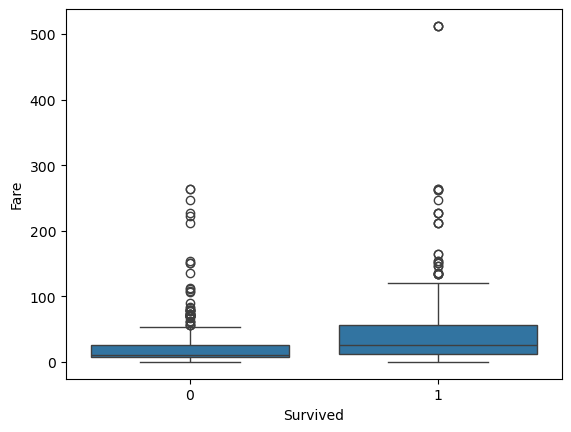

In [54]:
croisement(titanic.Survived, titanic['Pclass'])
croisement(titanic.Survived, titanic['Sex'])
croisement(titanic.Survived, titanic['SibSp'])
croisement(titanic.Survived, titanic['Parch'])
croisement(titanic.Survived, titanic['Embarked'])

#Si variable avec trop de modalité, faire boite a moustache
sns.boxplot(x=titanic.Survived, y=titanic['Age'], data = titanic)
plt.show()
sns.boxplot(x=titanic.Survived, y=titanic['Fare'], data = titanic)
plt.show()